In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [9]:
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
wine_dataset = pd.read_csv('WineQT.csv')
print(wine_dataset)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [5]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
wine_dataset = wine_dataset.drop('Id', axis=1)
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [28]:
wine_dataset.describe().T.style.background_gradient(cmap='Greys')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


In [12]:
wine_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
wines_correlation = wine_dataset.corr().style.background_gradient(cmap='YlOrRd')
wines_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


Text(0.5, 1.0, 'Correlation of Wines Datatset')

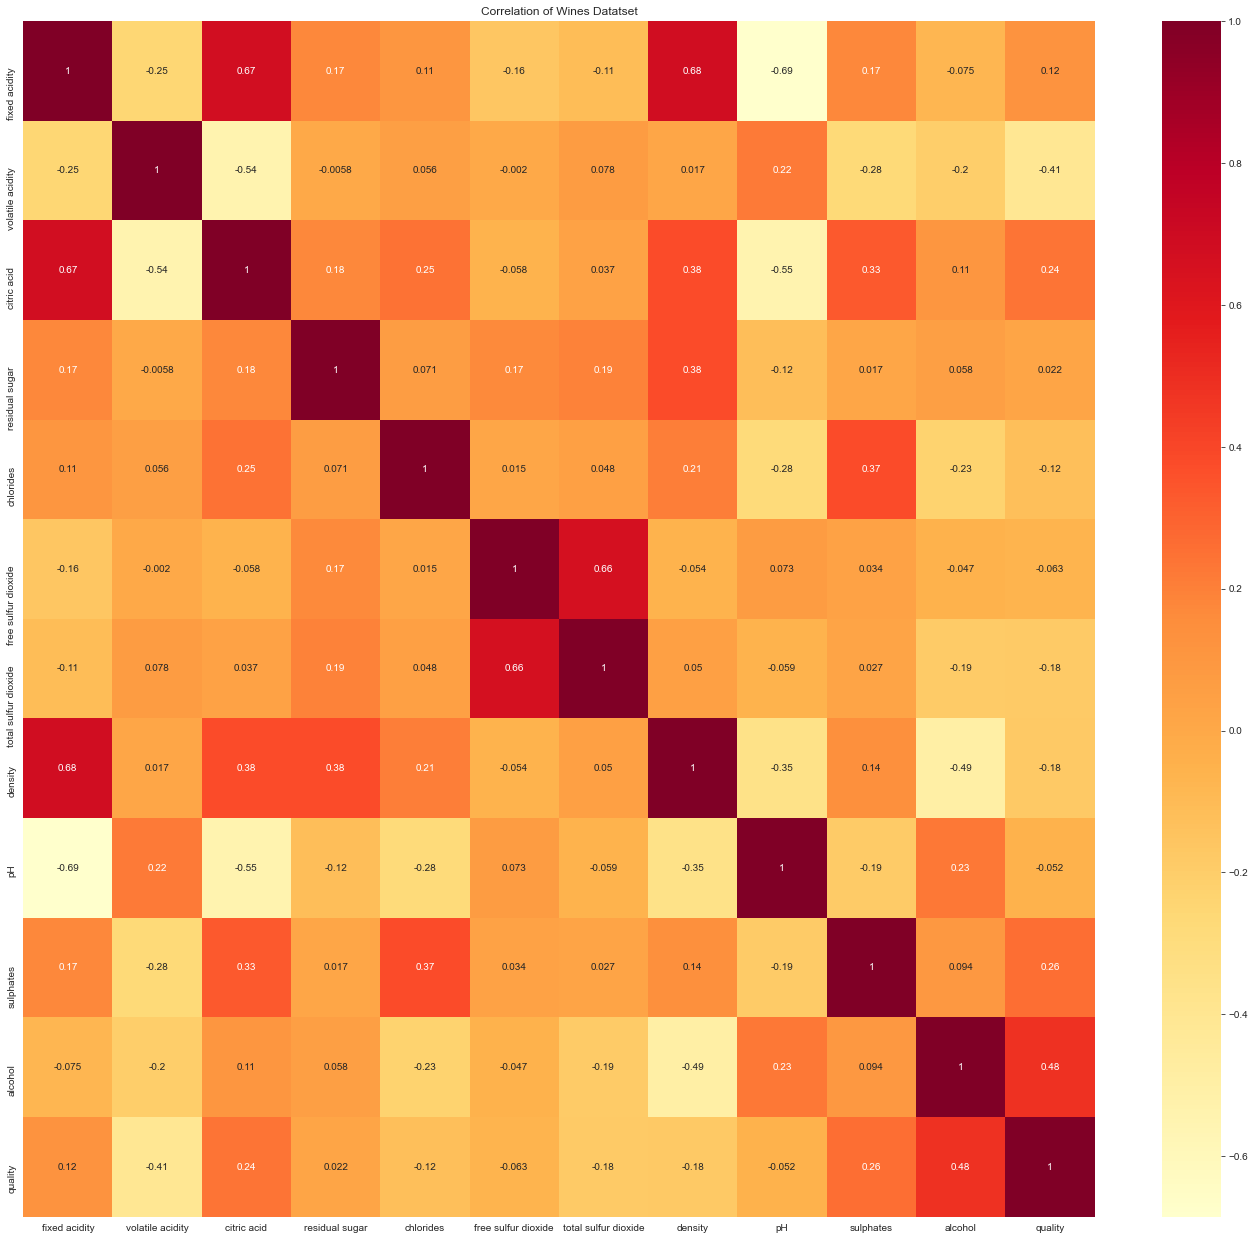

In [26]:
plt.figure(figsize=(24, 22))
sns.heatmap(data=wine_dataset.corr(), cmap='YlOrRd', annot=True, xticklabels=wine_dataset.corr().columns, yticklabels=wine_dataset.corr().columns)
plt.title('Correlation of Wines Datatset')

In [51]:
def feature_plot(feature):
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    feature.plot(kind='hist')
    plt.title(f'{feature.name} Histogram Plot')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(feature)
    plt.title(f'{feature.name} BoxPlot')
    
    mean_value = feature.mean()
    plt.subplot(1, 3, 3)
    sns.distplot(feature)
    plt.axvline(mean_value, linestyle='--', color='green')
    plt.title(f'{feature.name} Normal Plot')

In [52]:
columns = wine_dataset.select_dtypes(exclude='object')
columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


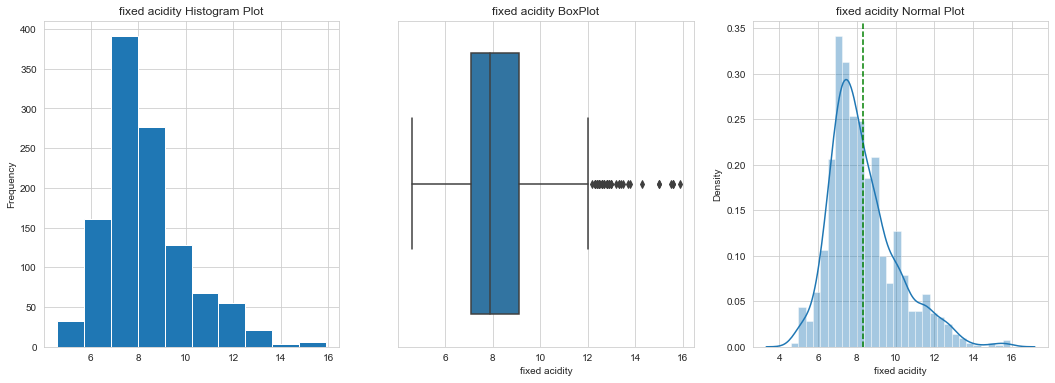

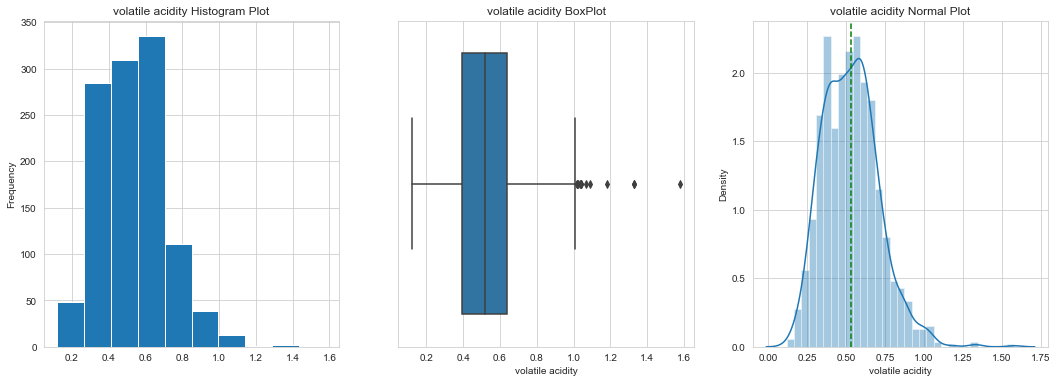

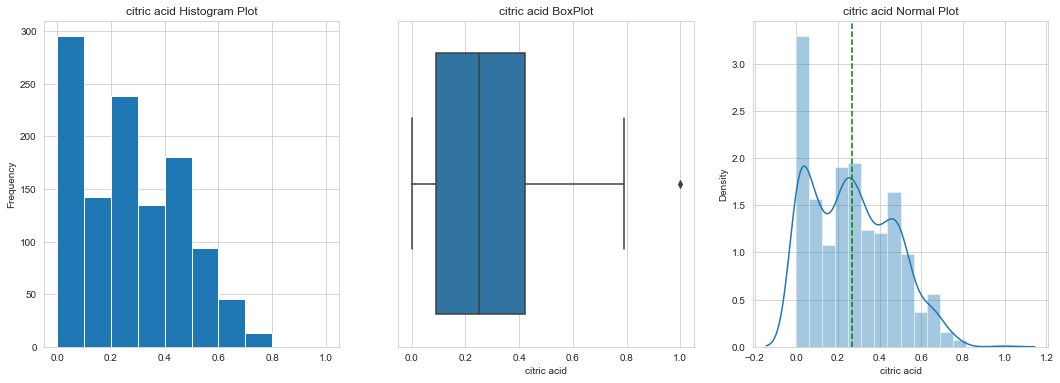

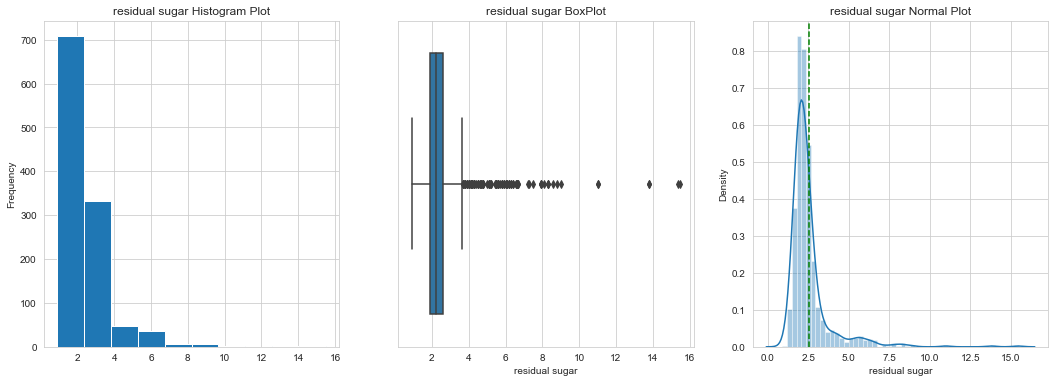

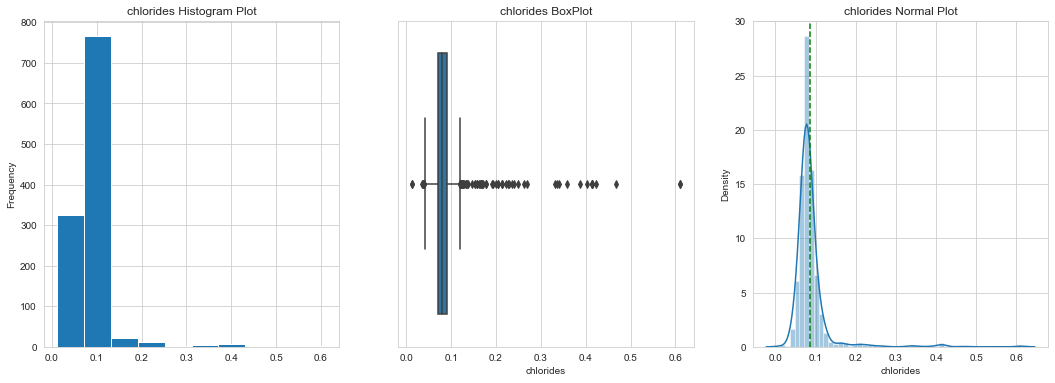

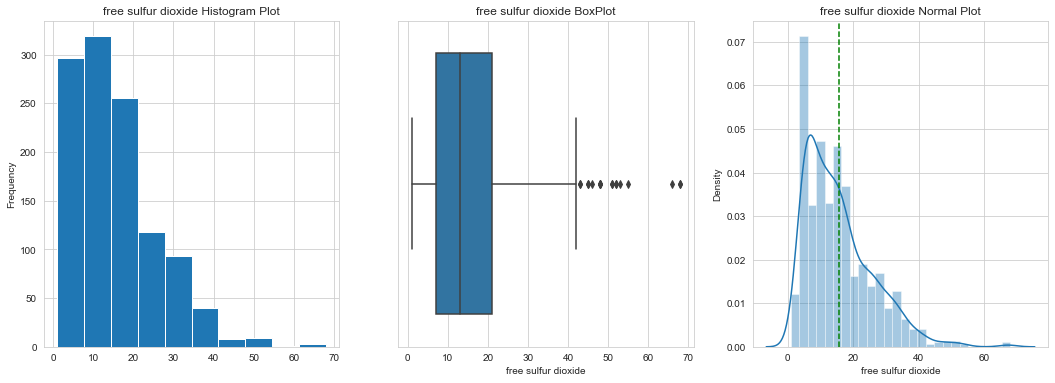

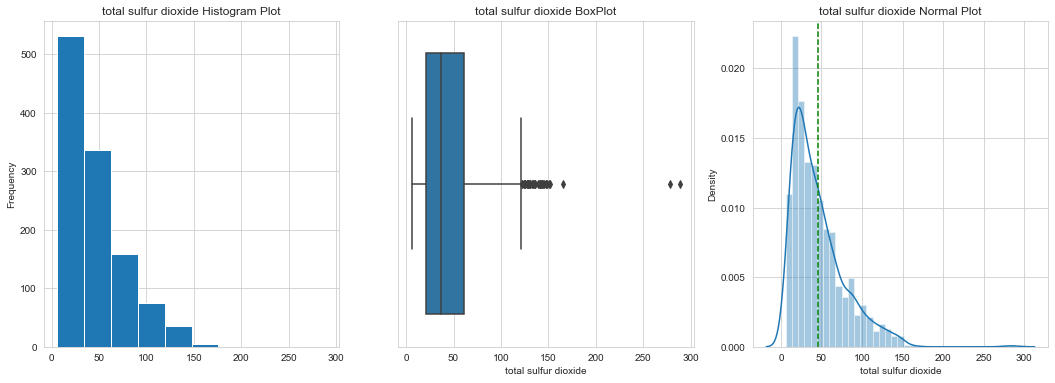

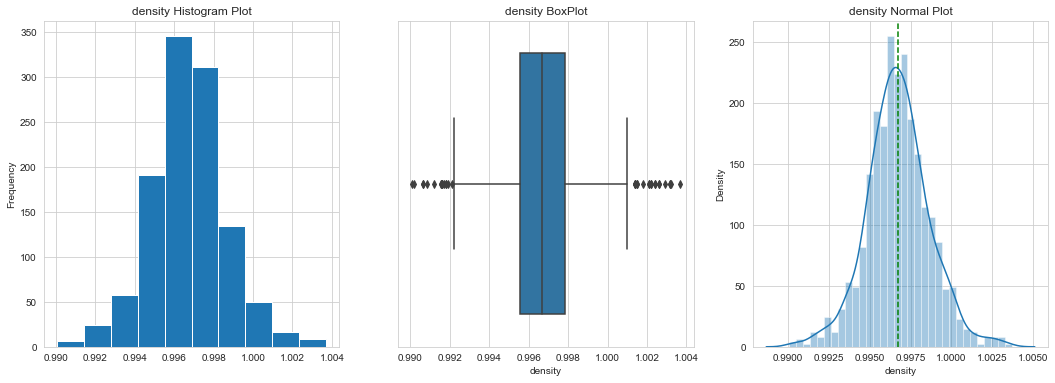

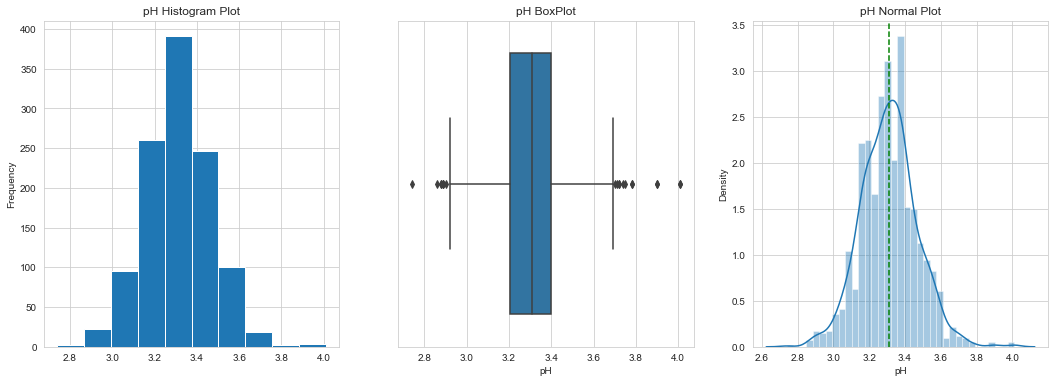

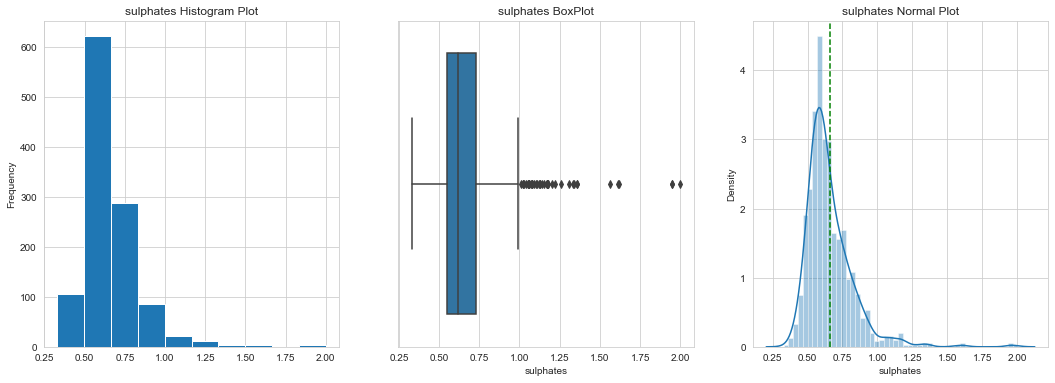

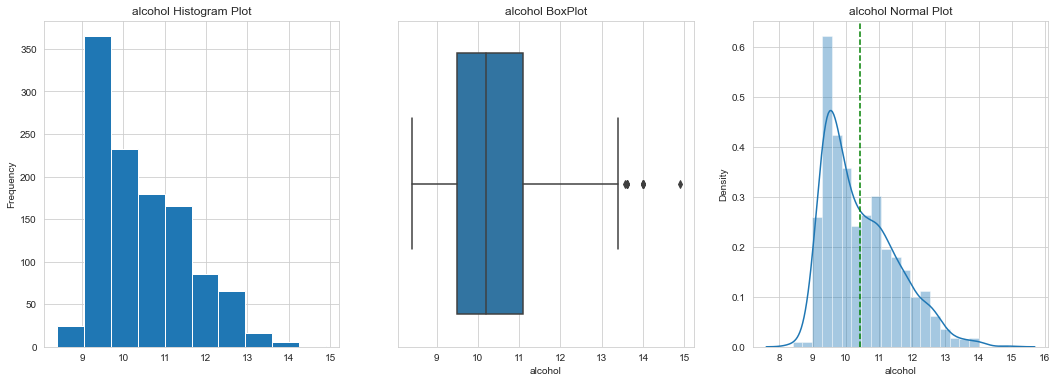

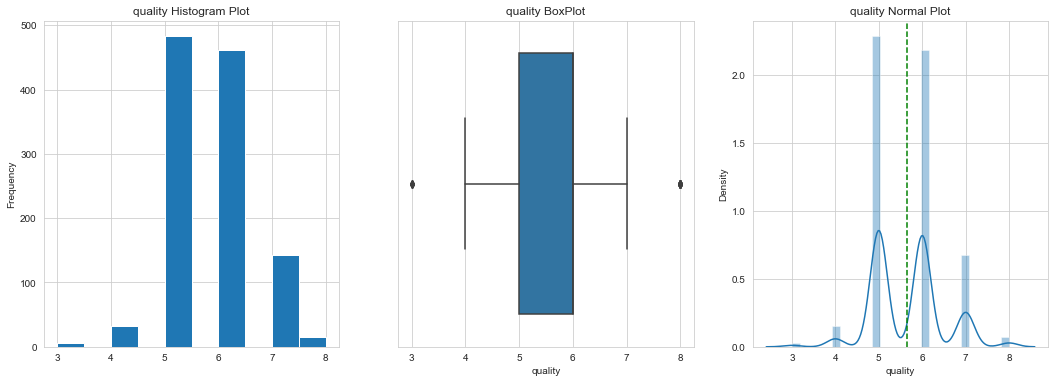

In [53]:
for col in columns.columns:
    feature_plot(columns[col])

In [63]:
wine_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

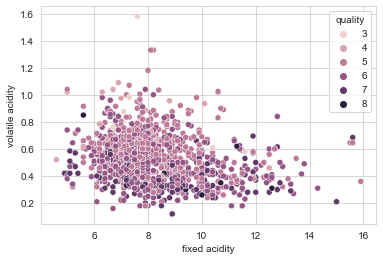

In [64]:
sns.scatterplot(data=wine_dataset, x='fixed acidity', y='volatile acidity', hue='quality')

<AxesSubplot:xlabel='citric acid', ylabel='residual sugar'>

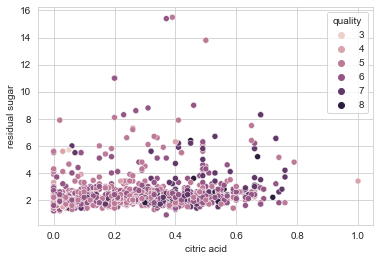

In [65]:
sns.scatterplot(data=wine_dataset, x='citric acid', y='residual sugar', hue='quality')

<AxesSubplot:xlabel='chlorides', ylabel='free sulfur dioxide'>

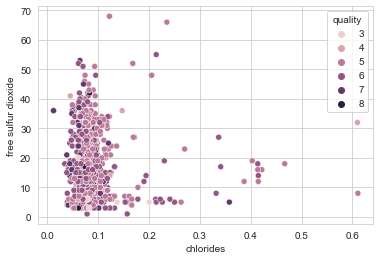

In [67]:
sns.scatterplot(data=wine_dataset, x='chlorides', y='free sulfur dioxide', hue='quality')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='density'>

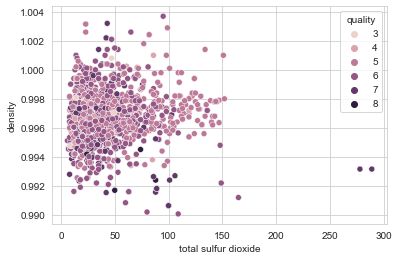

In [68]:
sns.scatterplot(data=wine_dataset, x='total sulfur dioxide', y='density', hue='quality')

<AxesSubplot:xlabel='pH', ylabel='sulphates'>

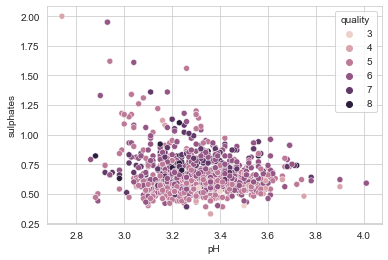

In [69]:
sns.scatterplot(data=wine_dataset, x='pH', y='sulphates', hue='quality')

<AxesSubplot:xlabel='sulphates', ylabel='alcohol'>

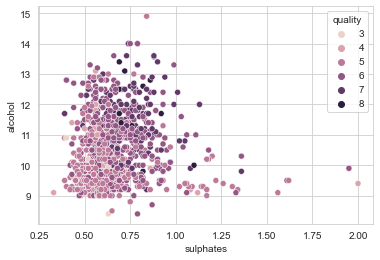

In [71]:
sns.scatterplot(data=wine_dataset, x='sulphates', y='alcohol', hue='quality')

In [74]:
X = wine_dataset.drop('quality', axis=1)
y = wine_dataset['quality']

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 11)
(800,)
(343, 11)
(343,)


In [102]:
def models(X_train, y_train, X_test, y_test, classifier):
    
    print('--'*45)
    
    model = classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    
    print(f'Evalation of {model}')
    print('*'*45)
    
    print('Classification Report : ')
    print(f'{classification_report(y_test, prediction)}')
    
    print('Confusion Matrix : ')
    sns.heatmap(confusion_matrix(y_test, prediction), cmap='YlOrRd', annot=True)
    plt.title('Confusion Matrix')
    plt.show()
    
    print(f'Accuracy of {model} : {round(accuracy_score(y_test, prediction)*100, 2)}%')
    
    print('*'*45)
    print('Completed Evaluation Process')
    
    print('--'*45)

------------------------------------------------------------------------------------------
Evalation of DecisionTreeClassifier()
*********************************************
Classification Report : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.65      0.69      0.67       143
           6       0.57      0.52      0.54       146
           7       0.40      0.41      0.40        41
           8       0.43      0.75      0.55         4

    accuracy                           0.57       343
   macro avg       0.34      0.40      0.36       343
weighted avg       0.57      0.57      0.56       343

Confusion Matrix : 


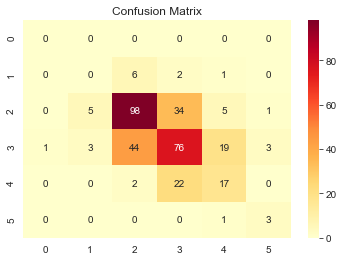

Accuracy of DecisionTreeClassifier() : 56.56%
*********************************************
Completed Evaluation Process
------------------------------------------------------------------------------------------


In [103]:
tree_classifier = DecisionTreeClassifier()
models(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, classifier=tree_classifier)

------------------------------------------------------------------------------------------
Evalation of RandomForestClassifier()
*********************************************
Classification Report : 
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.69      0.78      0.73       143
           6       0.64      0.64      0.64       146
           7       0.70      0.56      0.62        41
           8       1.00      0.25      0.40         4

    accuracy                           0.67       343
   macro avg       0.60      0.45      0.48       343
weighted avg       0.65      0.67      0.66       343

Confusion Matrix : 


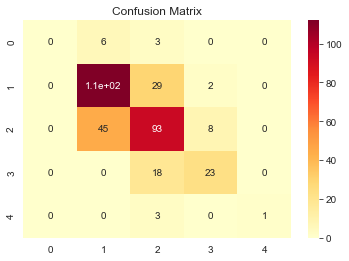

Accuracy of RandomForestClassifier() : 66.76%
*********************************************
Completed Evaluation Process
------------------------------------------------------------------------------------------


In [104]:
random_forest = RandomForestClassifier()
models(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, classifier=random_forest)

In [106]:
params_tree = {
    'max_depth' : [2, 3, 5, 10, 20],
    'min_samples_leaf' : [5, 10, 20, 50, 100],
    'criterion' : ['gini', 'entropy']
}

In [107]:
grid_search_tree = GridSearchCV(
    estimator = tree_classifier,
    param_grid = params_tree,
    cv = 4,
    n_jobs = -1,
    verbose = 1,
    scoring = 'accuracy'
)

grid_search_tree.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [109]:
scores = pd.DataFrame(grid_search_tree.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007052,3.705962e-03,0.000249,0.000432,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520,0.535,0.565,0.530,0.53750,0.016771,28
1,0.005416,1.638811e-03,0.002249,0.001781,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520,0.535,0.565,0.530,0.53750,0.016771,28
2,0.004583,1.018996e-03,0.001248,0.001637,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520,0.535,0.565,0.530,0.53750,0.016771,28
3,0.003616,2.900553e-03,0.000998,0.001729,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.500,0.535,0.565,0.515,0.52875,0.024335,39
4,0.007989,9.884312e-07,0.001997,0.001997,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.535,0.540,0.585,0.555,0.55375,0.019486,13


In [110]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
37,0.004993,0.001730,0.001997,0.001997,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.535,0.64,0.565,0.540,0.57000,0.041982,1
30,0.003639,0.001654,0.000000,0.000000,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.570,0.55,0.590,0.565,0.56875,0.014307,2
31,0.004796,0.000884,0.000000,0.000000,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.570,0.55,0.590,0.565,0.56875,0.014307,2
32,0.003529,0.000807,0.001587,0.001690,entropy,3,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.560,0.56,0.590,0.560,0.56750,0.012990,4
9,0.008284,0.001020,0.001302,0.001632,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.565,0.54,0.585,0.555,0.56125,0.016346,5


In [112]:
tree_hypertune = grid_search_tree.best_estimator_
tree_hypertune

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20)

------------------------------------------------------------------------------------------
Evalation of DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20)
*********************************************
Classification Report : 
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.57      0.82      0.67       143
           6       0.54      0.38      0.45       146
           7       0.44      0.37      0.40        41
           8       0.00      0.00      0.00         4

    accuracy                           0.55       343
   macro avg       0.31      0.31      0.30       343
weighted avg       0.52      0.55      0.52       343

Confusion Matrix : 


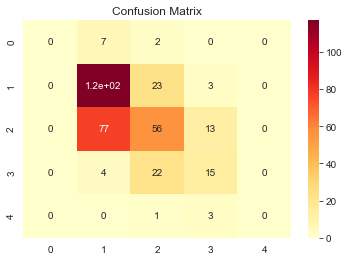

Accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20) : 54.81%
*********************************************
Completed Evaluation Process
------------------------------------------------------------------------------------------


In [113]:
models(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, classifier=tree_hypertune)

In [114]:
accuracy_score(y_train, tree_hypertune.predict(X_train))

0.61375

In [115]:
accuracy_score(y_train, tree_classifier.predict(X_train))

1.0

In [117]:
param_forest = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf' : [5, 10, 20, 50, 100],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [119]:
grid_search_forest = GridSearchCV(
    estimator = random_forest,
    param_grid = param_forest,
    cv = 4,
    n_jobs = -1,
    verbose = 2,
    scoring = 'accuracy'
)

grid_search_forest.fit(X_train, y_train)

Fitting 4 folds for each of 960 candidates, totalling 3840 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy', verbose=2)

In [120]:
scores_forest = pd.DataFrame(grid_search_forest.cv_results_)
scores_forest.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.313612,0.097477,0.028962,0.013361,True,gini,80,2,5,8,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.590,0.600,0.660,0.590,0.61000,0.029155,189
1,0.725587,0.111061,0.042208,0.001773,True,gini,80,2,5,8,200,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.645,0.610,0.680,0.580,0.62875,0.037479,11
2,0.971345,0.113935,0.070905,0.008174,True,gini,80,2,5,8,300,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.590,0.605,0.665,0.600,0.61500,0.029368,125
3,7.651875,0.626946,0.884324,0.022920,True,gini,80,2,5,8,1000,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.625,0.615,0.675,0.575,0.62250,0.035620,44
4,0.169749,0.007779,0.013917,0.001935,True,gini,80,2,5,10,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.600,0.630,0.675,0.560,0.61625,0.042038,113


In [121]:
scores.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
37,0.004993,0.001730,0.001997,0.001997,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.535,0.64,0.565,0.540,0.57000,0.041982,1
30,0.003639,0.001654,0.000000,0.000000,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.570,0.55,0.590,0.565,0.56875,0.014307,2
31,0.004796,0.000884,0.000000,0.000000,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.570,0.55,0.590,0.565,0.56875,0.014307,2
32,0.003529,0.000807,0.001587,0.001690,entropy,3,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.560,0.56,0.590,0.560,0.56750,0.012990,4
9,0.008284,0.001020,0.001302,0.001632,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.565,0.54,0.585,0.555,0.56125,0.016346,5


In [122]:
forest_hypertune = grid_search_forest.best_estimator_
forest_hypertune

RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=1000)

------------------------------------------------------------------------------------------
Evalation of RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=1000)
*********************************************
Classification Report : 
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.67      0.76      0.71       143
           6       0.58      0.64      0.61       146
           7       0.62      0.32      0.42        41
           8       0.00      0.00      0.00         4

    accuracy                           0.62       343
   macro avg       0.37      0.34      0.35       343
weighted avg       0.60      0.62      0.60       343

Confusion Matrix : 


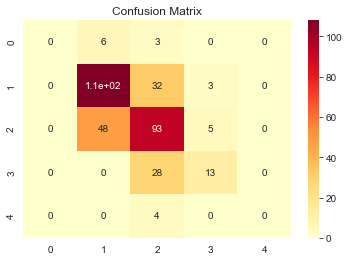

Accuracy of RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=1000) : 62.39%
*********************************************
Completed Evaluation Process
------------------------------------------------------------------------------------------


In [123]:
models(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, classifier=forest_hypertune)

In [124]:
accuracy_score(y_train, forest_hypertune.predict(X_train))

0.825

In [125]:
accuracy_score(y_train, random_forest.predict(X_train))

1.0